In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
from scipy.optimize import curve_fit

In [ ]:
# import os                           # import all functions in os library
# import numpy as np                  # import all functions in numpy library
# import pandas as pd                 # import all functions in pandas library

In [5]:
#  import matplotlib.pyplot as plt        # pyplot is a set of functions in matplotlib library
# here just importing a set of funtions (pyplot), not the full library

In [6]:
# from scipy.optimize import curve_fit       # optimize is a set of functions in scipy library
                                             # curve_fit is a function in optimize set
# here only importing the curve_fit function, not the optimize set, not the entire scipy library

In [9]:
data_file = os.path.join('CSV_folder', 'MM_df.csv')
rates_df = pd.read_csv(data_file)
rates_df

,pNP (mM),slopes,initial_velocities
0,20.00,0.514091,34.272718
1,10.00,0.503140,33.542678
2,7.00,0.470435,31.362310
3,4.00,0.417021,27.801416
4,2.00,0.342445,22.829652
5,1.00,0.246260,16.417302
6,0.70,0.202843,13.522863
7,0.40,0.136443,9.096204
8,0.20,0.076442,5.096143
9,0.10,0.078070,5.204653


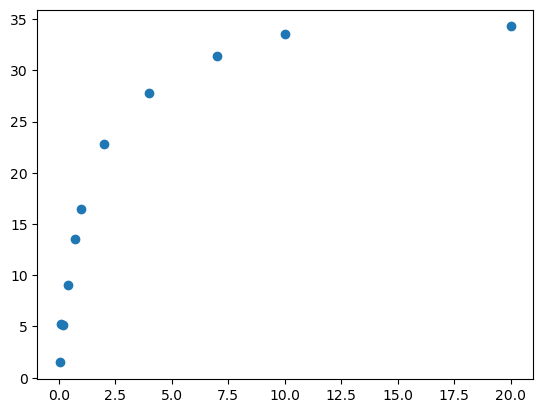

In [10]:
# Create your independent and dependent variables for curve fitting.
xdata = rates_df["pNP (mM)"]                  # x axis = substrate concentration
ydata = rates_df['initial_velocities']        # y axis = velocities

# Inspect your data to make sure it looks like a Michaelis-Menten plot
plt.plot(xdata, ydata, 'o', label = "Data")

In [11]:
# Creating Function
# def function_name(independent_variable, parameter1, parameter2):
#    ** function body code **
#    return value_to_return

In [12]:
#  create a function for the Michaelis-Menten equation.
def MM(SubConc, Vmax, Km):
    Vi = Vmax * SubConc / (Km + SubConc)
    return Vi

In [17]:
vi = MM(0.5, 100, 15)
print(f'If Vmax = 100, Km = 15 and Substrate Concentration = 0.5 , then Vi is {vi}')

If Vmax = 100, Km = 15 and Substrate Concentration = 0.5 , then Vi is 3.225806451612903


In [18]:
MM(rates_df['pNP (mM)'], 100, 1)            # output not needed in upcoming codes

0     95.238095
1     90.909091
2     87.500000
3     80.000000
4     66.666667
5     50.000000
6     41.176471
7     28.571429
8     16.666667
9      9.090909
10     4.761905
Name: pNP (mM), dtype: float64

In [19]:
# Use the function curve_fit to fit your data.
popt, pcov = curve_fit(MM, xdata, ydata)

In [20]:
# Extract the fit parameters from the output of curve_fit.
Vmax = popt[0]
Km = popt[1]

# Extract one standard deviation for each parameter
stdev = np.sqrt(np.diag(pcov))          # returns one standard deviation for each parameter

print(f'Vmax for this reaction: {Vmax} +/- {stdev[0]}')
print(f'Km for this reaction: {Km} +/- {stdev[1]}')

Vmax for this reaction: 36.65734835362564 +/- 0.6749595122904651
Km for this reaction: 1.1926322416733852 +/- 0.08042268542802396


In [23]:
print(f'Vmax for this reaction: {Vmax:.2f} +/- {stdev[0]:.2f}')
print(f'Km for this reaction: {Km:.3f} +/- {stdev[1]:.3f}')

Vmax for this reaction: 36.66 +/- 0.67
Km for this reaction: 1.193 +/- 0.080


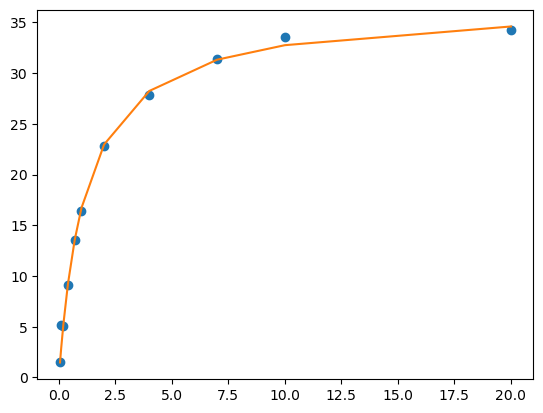

In [24]:
fit_y = MM(xdata, Vmax, Km)    # calculates y values based on the curve_fit parameters

plt.plot(xdata, ydata, 'o', label = 'exp_data')    # the experimental data
plt.plot(xdata, fit_y, '-', label = 'fit_data')    # the fit equation

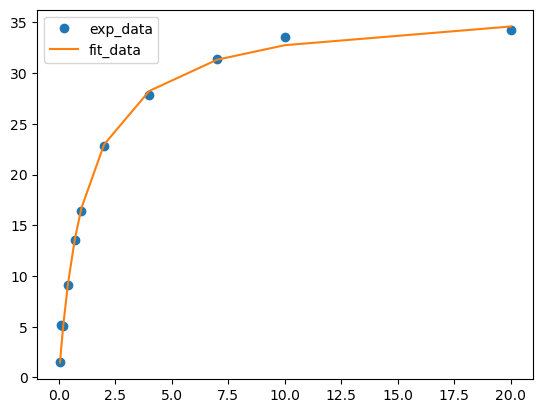

In [25]:
fit_y = MM(xdata, Vmax, Km)    # calculates y values based on the curve_fit parameters

plt.plot(xdata, ydata, 'o', label = 'exp_data')    # the experimental data
plt.plot(xdata, fit_y, '-', label = 'fit_data')    # the fit equation
plt.legend()

Text(0, 0.5, 'Initial Velocity')

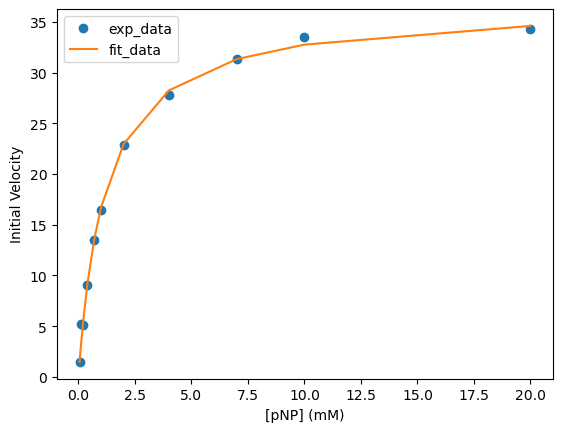

In [26]:
fit_y = MM(xdata, Vmax, Km)    # calculates y values based on the curve_fit parameters

plt.plot(xdata, ydata, 'o', label = 'exp_data')    # the experimental data
plt.plot(xdata, fit_y, '-', label = 'fit_data')    # the fit equation
plt.legend()
plt.xlabel("[pNP] (mM)")
plt.ylabel("Initial Velocity")

In [27]:
# the curve appears a bit disjointed, because it provides values only at the selected concentrations of the substrate.
# Smoothing the plot means removing the disjoints/angles in the curve, making the curvature better.

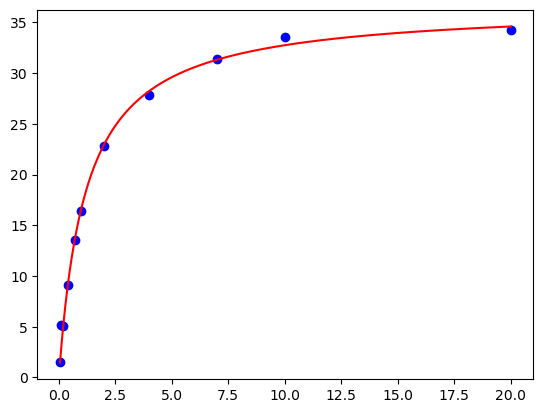

In [29]:
# To generate a smoother fitted curve
smooth_x = np.linspace(np.min(xdata), np.max(xdata), 1000)         # linspace from cBLAST
smooth_y = MM(smooth_x, Vmax, Km)

plt.plot(xdata, ydata, "bo", label = 'exp_data')               # plot of the experimental data
plt.plot(smooth_x, smooth_y, 'r', label = "fit_data")          # plot of the fit data

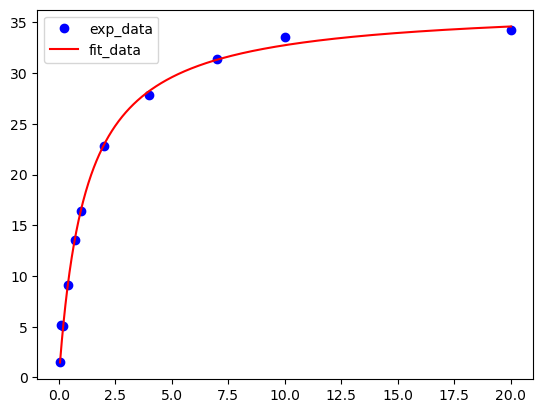

In [30]:
smooth_x = np.linspace(np.min(xdata), np.max(xdata), 1000)         # linspace from cBLAST
smooth_y = MM(smooth_x, Vmax, Km)

plt.plot(xdata, ydata, "bo", label = 'exp_data')               # plot of the experimental data
plt.plot(smooth_x, smooth_y, 'r', label = "fit_data")          # plot of the fit data
plt.legend()

Text(0, 0.5, 'Initial Velocity')

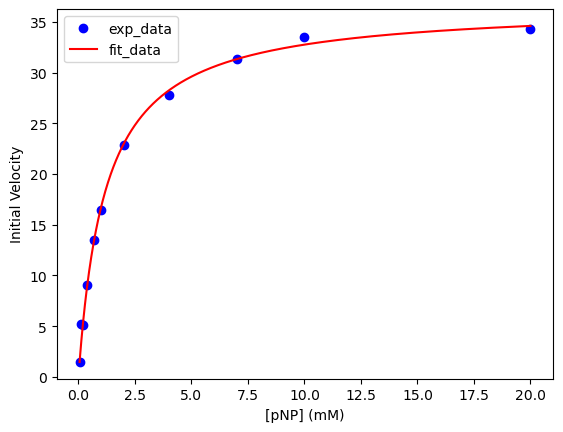

In [31]:
smooth_x = np.linspace(np.min(xdata), np.max(xdata), 1000)         # linspace from cBLAST
smooth_y = MM(smooth_x, Vmax, Km)

plt.plot(xdata, ydata, "bo", label = 'exp_data')               # plot of the experimental data
plt.plot(smooth_x, smooth_y, 'r', label = "fit_data")          # plot of the fit data
plt.legend()
plt.xlabel("[pNP] (mM)")
plt.ylabel("Initial Velocity")